# Быстрый старт в анализ данных

## Выполнил: Слащинин Сергей, 17ИАД-МАГ

# Определение кредитоспособности клиента

В данном датасете представлена информация по клиентам (все для всех параметров названия заменены для защиты конфиденциальности).
Каждый клиент имеет метку - 0 или 1, обозначающую его кредитоспособность. 1 - клиент сможет выплатить кредит, 0 - наоборот
## Задача
По имеющемуся набору параметров (14 различных параметров) для каждого клиента предсказать его кредитоспособность

## Данные 
https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29

## Description of the dataset

THIS CREDIT DATA ORIGINATES FROM QUINLAN (see below).   

1. Title: Australian Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  **All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.**
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 14 + class attribute

7.  Attribute Information:   THERE ARE 6 NUMERICAL AND 8 CATEGORICAL ATTRIBUTES. 
                             THE LABELS HAVE BEEN CHANGED FOR THE CONVENIENCE
                             OF THE STATISTICAL ALGORITHMS.   FOR EXAMPLE,
                             ATTRIBUTE 4 ORIGINALLY HAD 3 LABELS p,g,gg AND
                             THESE HAVE BEEN CHANGED TO LABELS 1,2,3.                             

    A1:	0,1    CATEGORICAL
        a,b
    A2:	continuous.
    A3:	continuous.
    A4:	1,2,3         CATEGORICAL
        p,g,gg
    A5:  1, 2,3,4,5, 6,7,8,9,10,11,12,13,14    CATEGORICAL
         ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x 
         
    A6:	 1, 2,3, 4,5,6,7,8,9    CATEGORICAL
        ff,dd,j,bb,v,n,o,h,z 

    A7:	continuous.
    A8:	1, 0       CATEGORICAL
        t, f.
    A9: 1, 0	    CATEGORICAL
        t, f.
    A10:	continuous.
    A11:  1, 0	    CATEGORICAL
          t, f.
    A12:    1, 2, 3    CATEGORICAL
            s, g, p 
    A13:	continuous.
    
    A14:	continuous.
    
    A15:   0,1
           -,+        (class attribute)
          
    Class 1 indicates clients with approved credits
            
8.  Missing Attribute Values:
    37 cases (5%) HAD one or more missing values.  The missing
    values from particular attributes WERE:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13
    
    THESE WERE REPLACED BY THE MODE OF THE ATTRIBUTE (CATEGORICAL)
                               MEAN OF THE ATTRIBUTE (CONTINUOUS)
                           
9.  Class Distribution
  
    +: 307 (44.5%)    CLASS 1
    -: 383 (55.5%)    CLASS 0


10.  There is no cost matrix.


## Загрузим необходимые библиотеки и считаем данные из файла

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('australian.dat', sep = ', ', engine = 'python')

In [3]:
data.index

RangeIndex(start=0, stop=690, step=1)

In [4]:
print(data.shape)
print(data.columns)

(690, 15)
Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'class'],
      dtype='object')


In [5]:
data.index

RangeIndex(start=0, stop=690, step=1)

## Характеристики признаков

In [6]:
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


## Попробуем визуализировать зависимости признаков

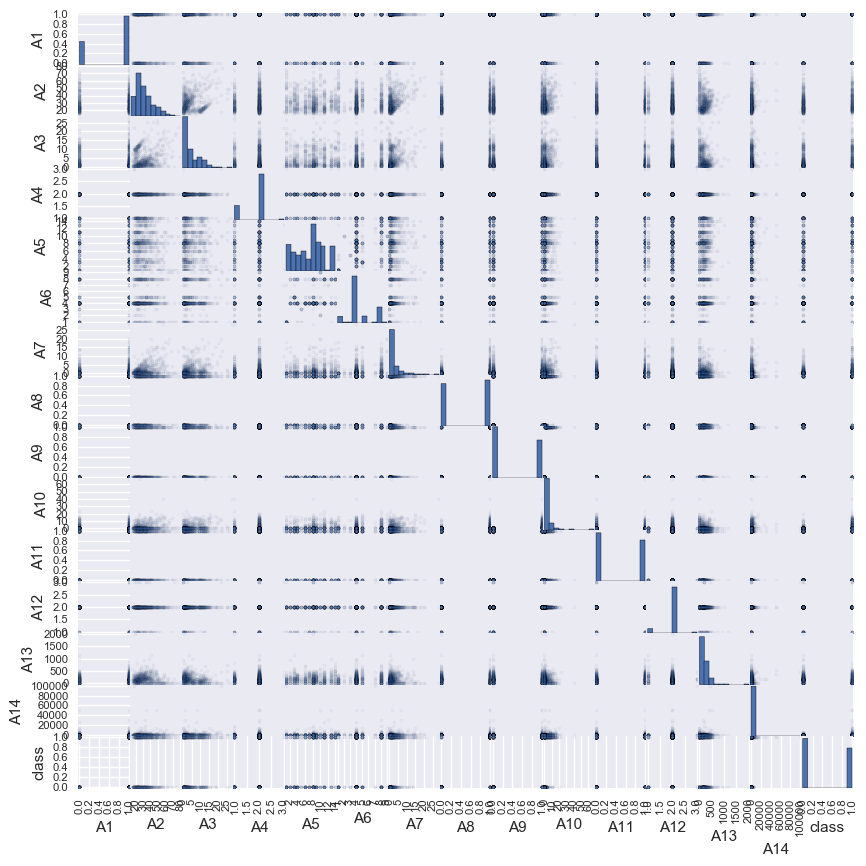

In [7]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (10, 10))
pass

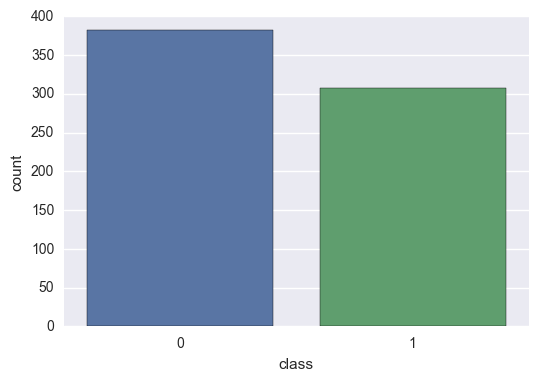

In [8]:
sns.countplot(data['class']);

## Найдем выборочную ковариационную матрицу

In [9]:
correlations = data.corr()
correlations

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
A1,1.000000,0.036659,-0.028166,-0.063528,-0.005321,0.052658,0.097009,0.000918,-0.063256,-0.008427,0.053984,-0.059901,0.058595,0.003616,-0.013897
A2,0.036659,1.000000,0.201315,0.089503,-0.093877,0.028510,0.392788,0.204342,0.083680,0.185574,0.054779,0.020703,-0.077159,0.018539,0.161626
A3,-0.028166,0.201315,1.000000,0.091526,0.027665,0.094504,0.298902,0.244317,0.174846,0.271207,-0.013023,0.093752,-0.222346,0.123121,0.206294
A4,-0.063528,0.089503,0.091526,1.000000,0.088846,0.046639,0.080624,0.129863,0.162464,0.106457,0.004964,0.006400,-0.001758,0.120065,0.194306
A5,-0.005321,-0.093877,0.027665,0.088846,1.000000,0.402284,0.144757,0.311833,0.222957,0.150166,0.024738,0.070222,0.088140,0.030735,0.373712
A6,0.052658,0.028510,0.094504,0.046639,0.402284,1.000000,0.240400,0.246193,0.080397,0.098841,0.093641,0.036435,0.070662,0.064841,0.246567
A7,0.097009,0.392788,0.298902,0.080624,0.144757,0.240400,1.000000,0.345689,0.222982,0.322330,0.138139,-0.016297,-0.076389,0.051345,0.322475
A8,0.000918,0.204342,0.244317,0.129863,0.311833,0.246193,0.345689,1.000000,0.432032,0.379532,0.091276,0.045054,-0.067387,0.090012,0.720407
A9,-0.063256,0.083680,0.174846,0.162464,0.222957,0.080397,0.222982,0.432032,1.000000,0.571498,0.017043,0.176097,-0.053321,0.077652,0.458301
A10,-0.008427,0.185574,0.271207,0.106457,0.150166,0.098841,0.322330,0.379532,0.571498,1.000000,0.006944,0.101479,-0.119808,0.063692,0.406410


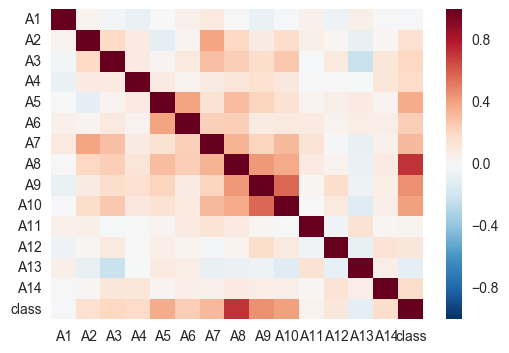

In [10]:
sns.heatmap(correlations, 
            xticklabels=correlations.columns.values,
            yticklabels=correlations.columns.values)

### **Как видно из матрицы (и heatmap для нее), наибольшее значение на определение кредитоспособности клиента, скорее всего, имеют параметры A5, A8, A9, A10 (корреляции больше 0.35).** Попробуем визуализировать зависимости между этими признаками и кредитоспособностью клиента

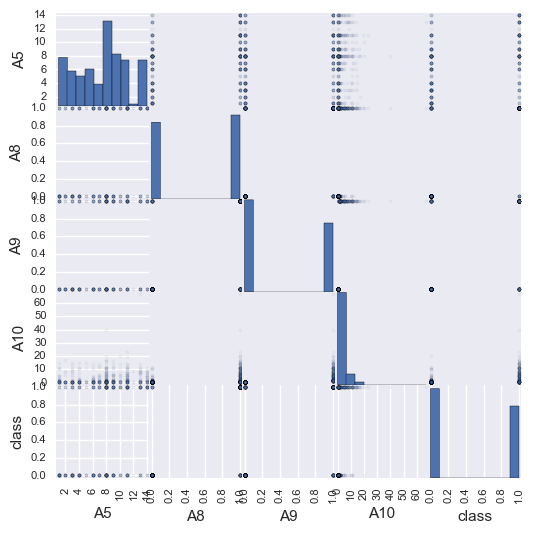

In [11]:
sub_data = data[["A5","A8","A9","A10","class"]]
scatter_matrix(sub_data, alpha = .05, figsize = (6, 6))
pass

In [12]:
sub_data.corr()

,A5,A8,A9,A10,class
A5,1.000000,0.311833,0.222957,0.150166,0.373712
A8,0.311833,1.000000,0.432032,0.379532,0.720407
A9,0.222957,0.432032,1.000000,0.571498,0.458301
A10,0.150166,0.379532,0.571498,1.000000,0.406410
class,0.373712,0.720407,0.458301,0.406410,1.000000


### **Можно заметить, что по одному бинарному параметру А8 можно с вероятностью 0.855 верно предсказать кредитоспособность клиента, а по одному параметру А9  - с вероянтостью 0.733. Однако большинство ошибок (77 из 100) это ошибки 1го рода (false_positives), т.е. выдача кредита некредитоспособным клиентам (такие ошибки более вредны для банков, т.к. могут привести к серьезным финансовым потерям) **

In [13]:
data_class = data["class"]
a8_predict = data['A8']
a9_predict = data['A9']
print(len(a8_predict))
print(len(a9_predict))
err_A8 = np.mean(data_class != a8_predict)
err_A9 = np.mean(data_class != a9_predict)

print(err_A8, err_A9)
print(1 - err_A8,1 - err_A9)

690
690
0.144927536232 0.266666666667
0.855072463768 0.733333333333


In [14]:
confusion_matrix(data_class, a8_predict)

array([[306,  77],
       [ 23, 284]])

## Задача


# Готовим данные

Итак, разделим оставшиеся переменные на качественные и количественные.

In [15]:
data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'class'],
      dtype='object')

In [16]:
categorical_columns = ['A1','A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12', 'class']
numerical_columns   = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']
print(categorical_columns)
print(numerical_columns)

['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12', 'class']
['A2', 'A3', 'A7', 'A10', 'A13', 'A14']


In [17]:
for c in categorical_columns:
    print(c, data[c].unique())

A1 [1 0]
A4 [2 1 3]
A5 [ 4  8  5  6  3 11  2 14  9 13  7  1 10 12]
A6 [4 3 8 1 5 9 2 7]
A8 [0 1]
A9 [0 1]
A11 [1 0]
A12 [2 1 3]
class [0 1]


In [18]:
data[numerical_columns].count(axis = 0)

A2     690
A3     690
A7     690
A10    690
A13    690
A14    690
dtype: int64

In [19]:
data_describe = data.describe()
data[categorical_columns].count(axis = 0)

A1       690
A4       690
A5       690
A6       690
A8       690
A9       690
A11      690
A12      690
class    690
dtype: int64

In [20]:
data['A4'].unique()

array([2, 1, 3], dtype=int64)

In [21]:
data_describe

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [22]:
binary_columns    = [c for c in categorical_columns if len(data[c].unique()) == 2]
nonbinary_columns = [c for c in categorical_columns if len(data[c].unique()) > 2]
print(binary_columns, nonbinary_columns)

['A1', 'A8', 'A9', 'A11', 'class'] ['A4', 'A5', 'A6', 'A12']


In [23]:
data = data.astype(object)

К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `race` принимает 5 различных значений: 

In [24]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['A4_1', 'A4_2', 'A4_3', 'A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6',
       'A5_7', 'A5_8', 'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13', 'A5_14',
       'A6_1', 'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_7', 'A6_8', 'A6_9', 'A12_1',
       'A12_2', 'A12_3'],
      dtype='object')


In [25]:
data_nonbinary = data_nonbinary.astype('int64')


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [26]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,A2,A3,A7,A10,A13,A14
count,690.00,690.0,690.0,690,690,690
unique,350.00,215.0,132.0,23,171,240
top,31.57,1.5,0.0,0,0,1
freq,12.00,21.0,70.0,395,132,295


In [27]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [28]:
data_numerical=data_numerical.astype('float64')

In [29]:
data_numerical.describe()

,A2,A3,A7,A10,A13,A14
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02
mean,7.024333e-15,3.472263e-16,5.127943e-16,1.444899e-16,1.866462e-17,5.084500e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.503231e+00,-9.559198e-01,-6.643947e-01,-4.935286e-01,-1.068862e+00,-1.952717e-01
25%,-7.506959e-01,-7.550425e-01,-6.150897e-01,-4.935286e-01,-6.041760e-01,-1.952717e-01
50%,-2.483030e-01,-4.035072e-01,-3.655762e-01,-4.935286e-01,-1.394900e-01,-1.943120e-01
75%,5.179411e-01,4.919034e-01,1.200038e-01,1.233822e-01,5.110704e-01,-1.193615e-01
max,4.107034e+00,4.668645e+00,7.851932e+00,1.328414e+01,1.054829e+01,1.899821e+01


## Соединяем все в одну таблицу

In [30]:
data[binary_columns] = data[binary_columns].astype('int64')

In [31]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

(690, 39)


In [32]:
data.describe()

,A2,A3,A7,A10,A13,A14,A4_1,A4_2,A4_3,A5_1,...,A6_8,A6_9,A12_1,A12_2,A12_3,A1,A8,A9,A11,class
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,690.000000,690.000000,690.000000,690.000000,...,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,7.024333e-15,3.472263e-16,5.127943e-16,1.444899e-16,1.866462e-17,5.084500e-17,0.236232,0.760870,0.002899,0.076812,...,0.20000,0.011594,0.082609,0.905797,0.011594,0.678261,0.523188,0.427536,0.457971,0.444928
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.425074,0.426862,0.053799,0.266485,...,0.40029,0.107128,0.275490,0.292323,0.107128,0.467482,0.499824,0.495080,0.498592,0.497318
min,-1.503231e+00,-9.559198e-01,-6.643947e-01,-4.935286e-01,-1.068862e+00,-1.952717e-01,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.506959e-01,-7.550425e-01,-6.150897e-01,-4.935286e-01,-6.041760e-01,-1.952717e-01,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.483030e-01,-4.035072e-01,-3.655762e-01,-4.935286e-01,-1.394900e-01,-1.943120e-01,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,5.179411e-01,4.919034e-01,1.200038e-01,1.233822e-01,5.110704e-01,-1.193615e-01,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,4.107034e+00,4.668645e+00,7.851932e+00,1.328414e+01,1.054829e+01,1.899821e+01,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

In [33]:
X = data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
y = data['class']
feature_names = X.columns


In [34]:
type(feature_names)

pandas.indexes.base.Index

In [35]:
feature_names

Index(['A2', 'A3', 'A7', 'A10', 'A13', 'A14', 'A4_1', 'A4_2', 'A4_3', 'A5_1',
       'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7', 'A5_8', 'A5_9', 'A5_10',
       'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A6_1', 'A6_2', 'A6_3', 'A6_4',
       'A6_5', 'A6_7', 'A6_8', 'A6_9', 'A12_1', 'A12_2', 'A12_3', 'A1', 'A8',
       'A9', 'A11'],
      dtype='object')

In [36]:
print(X.shape)
print(y.shape)
N, d = X.shape

(690, 38)
(690,)


In [684]:
from sklearn.cross_validation import train_test_split, cross_val_score, StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

483 207


# $k$NN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [39]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.140786749482 0.178743961353


In [40]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [41]:
err_test

0.17874396135265702

In [42]:
print(confusion_matrix(y_test, y_test_predict))

[[107   8]
 [ 29  63]]


### Вывод: для метода 10 ближайших соседей мы получили ошибку большую, чем при угадывании класса с помощью лишь 1 параметра А8, однако большинство ошибок - ошибки 2го рода (false negatives), которые менее опасны для банка

### Подбор параметров

In [43]:
err_train = list()
err_test = list()
from sklearn.grid_search import GridSearchCV
nnb = list(range(1, 60))
knn = KNeighborsClassifier()

#cva = StratifiedKFold(y, 10, True, 13)
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X, y)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)
err_cv = list(map(lambda x: 1 - x[1], grid.grid_scores_))
for k in nnb:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred      = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    err_train.append(np.mean(y_train != y_pred))
    err_test.append(np.mean(y_test != y_test_pred))

0.165217391304 13


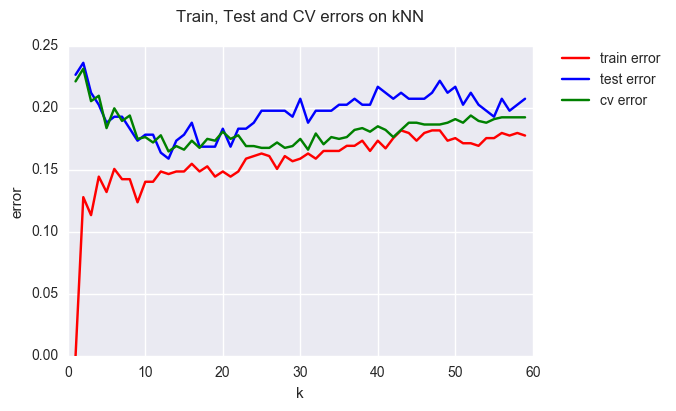

In [44]:

plt.title('Train, Test and CV errors on kNN\n')
plt.plot(nnb, err_train, 'r', label = "train error")
plt.plot(nnb, err_test, 'b', label = "test error")
plt.plot(nnb, err_cv, 'g', label = "cv error")
plt.xlabel('k')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### После подбора параметров лучший параметр для числа соседей это k=13. При k < 10 имеет место переобучение

In [45]:
knn = KNeighborsClassifier(n_neighbors = 13).fit(X_train, y_train)
y_test_predict = knn.predict(X_test);
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
y_predict = knn.predict(X)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.146997929607 0.159420289855
[[105  10]
 [ 23  69]]
0.150724637681
[[354  29]
 [ 75 232]]


### Вывод: после подбора параметров мы уменьшили среднюю вероятность ошибки, но увеличили число ошибок первого рода. При этом не удалось достичь результата для "примитивной" классификации с помощью параметра А8, где ошибка меньше

# Логистическая регрессия

In [46]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=400)
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=400, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
y_train_predict = logistic_model.predict(X_train)
y_test_predict = logistic_model.predict(X_test)
y_predict = logistic_model.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.124223602484 0.144927536232
[[100  15]
 [ 15  77]]
0.130434782609
[[335  48]
 [ 42 265]]


### Мы смогли достигнуть лучшего среднего уровня ошибки, чем для "примитивного" классификатора(по параметру А8), а также уменьшить относительно него число ошибок первого рода.

## Изменим параметры модели

In [48]:
logistic_model = LogisticRegression(max_iter=400, C=2)
logistic_model.fit(X_train, y_train)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=400, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
y_train_predict = logistic_model.predict(X_train)
y_test_predict = logistic_model.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.124223602484 0.144927536232


In [50]:
reg_coef = np.linspace(start=0.05, stop = 2.5, num = 50)
grid = GridSearchCV(logistic_model, param_grid = {'C':reg_coef}, cv=10)
grid.fit(X, y)
err_train = list()
err_test = list()
best_solver = 'liblinear'
best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)
err_cv = list(map(lambda x: 1 - x[1], grid.grid_scores_))
for c in reg_coef:
    logistic_model = LogisticRegression(max_iter=400, C = c, solver = best_solver)
    logistic_model.fit(X_train, y_train)
    y_train_pred      = logistic_model.predict(X_train)
    y_test_pred = logistic_model.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))

0.14347826087 0.8


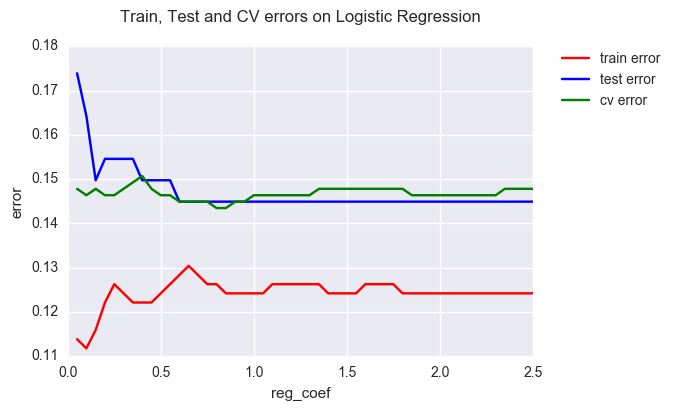

In [51]:
plt.title('Train, Test and CV errors on Logistic Regression\n')
plt.plot(reg_coef, err_train, 'r', label = "train error")
plt.plot(reg_coef, err_test, 'b', label = "test error")
plt.plot(reg_coef, err_cv, 'g', label = "cv error")
plt.xlabel('reg_coef')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [52]:
logistic_model = LogisticRegression(max_iter=400, C=best_C, solver = best_solver)
logistic_model.fit(X_train, y_train)

LogisticRegression(C=0.80000000000000004, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=400,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [53]:
y_train_predict = logistic_model.predict(X_train)
y_test_predict = logistic_model.predict(X_test)
y_predict = logistic_model.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.126293995859 0.144927536232
[[100  15]
 [ 15  77]]
0.131884057971
[[335  48]
 [ 43 264]]


### Вывод: логистическая регрессия для данной задачи работает лучше, чем метод ближайших соседей и "примитивный" классификатор. Подбор параметра регуляризации дал положительные результаты (немного уменьшилась ошибка на глобальной выборке)

# LDA

In [152]:
from sklearn import discriminant_analysis
import warnings 
#warnings.filterwarnings('always')
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [685]:
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

y_train_predict = lda_model.predict(X_train)
y_test_predict = lda_model.predict(X_test)
y_predict = lda_model.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.136645962733 0.130434782609
[[95 20]
 [ 7 85]]
0.134782608696
[[313  70]
 [ 23 284]]


### LDA работает лучше линейной регрессии на тестовой выборке, показывает лучшие результаты среди уже рассмотренных классификаторов. Однако стоит заметить, что большая часть ошибок - это ошибки первого рода, более опасные для банка

In [56]:
pd.set_option('display.max_columns', None)

np.abs(X_train.corr()) > 0.7

,A2,A3,A7,A10,A13,A14,A4_1,A4_2,A4_3,A5_1,A5_2,A5_3,A5_4,A5_5,A5_6,A5_7,A5_8,A5_9,A5_10,A5_11,A5_12,A5_13,A5_14,A6_1,A6_2,A6_3,A6_4,A6_5,A6_7,A6_8,A6_9,A12_1,A12_2,A12_3,A1,A8,A9,A11
A2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A7,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A10,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A13,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A14,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A4_1,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A4_2,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A4_3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A5_1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


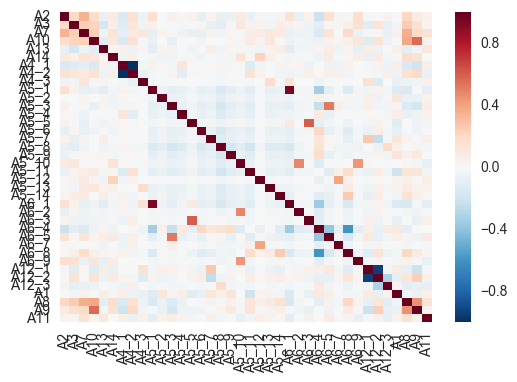

In [111]:
corrs = X_train.corr()
sns.heatmap(corrs, 
            xticklabels=corrs.columns.values,
            yticklabels=corrs.columns.values)

### Уберем сильно коррелирующие столбцы

In [58]:
def del_corr(dataset, dataset2, dataset3, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    print
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset  
                    del dataset2[colname]
                    del dataset3[colname]
X_train_new = X_train.copy()
X_test_new = X_test.copy()
X_new = X.copy()
del_corr(X_train_new, X_test_new,X_new,  0.8)
print(X_train_new.shape)
print(X_test_new.shape)


(483, 35)
(207, 35)


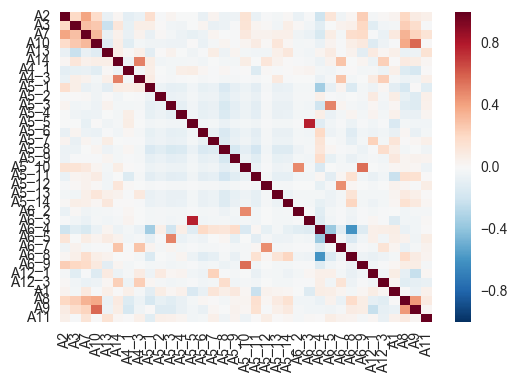

In [110]:
corrs = X_new.corr()
sns.heatmap(corrs, 
            xticklabels=corrs.columns.values,
            yticklabels=corrs.columns.values)

In [151]:
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(solver = 'svd')
lda_model.fit(X_train_new, y_train)
y_train_predict = lda_model.predict(X_train_new)
y_test_predict = lda_model.predict(X_test_new)
y_predict = lda_model.predict(X_new)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.136645962733 0.130434782609
[[95 20]
 [ 7 85]]


### Вывод: удаление сильно коррелирующих столбцов не дало положительных результатов

# QDA

In [150]:
from sklearn import discriminant_analysis
warnings.filterwarnings("ignore")
qda_model = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_train_predict = qda_model.predict(X_train)
y_test_predict = qda_model.predict(X_test)
y_predict = qda_model.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.320910973085 0.309178743961
[[112   3]
 [ 61  31]]


### По сравнению с предыдущими методами - гораздо большая вероятность ошибки (большинство - ошибки 2го рода)

In [62]:

reg_param = np.linspace(start=0.01, stop = 1.0, num = 100)
grid = GridSearchCV(qda_model, param_grid = {'reg_param': reg_param}, cv=10)
grid.fit(X, y)
err_train = list()
err_test = list()
best_cv_err = 1 - grid.best_score_
best_reg_param = grid.best_estimator_.reg_param
print(best_cv_err, best_reg_param)
err_cv = list(map(lambda x: 1 - x[1], grid.grid_scores_))
for c in reg_param:
    qda_model = discriminant_analysis.QuadraticDiscriminantAnalysis(reg_param = c)
    qda_model.fit(X_train, y_train)
    y_train_pred      = qda_model.predict(X_train)
    y_test_pred = qda_model.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))

0.179710144928 0.03


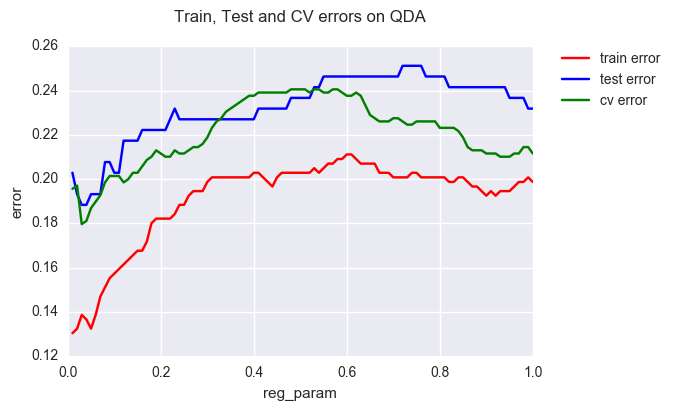

In [63]:
plt.title('Train, Test and CV errors on QDA\n')
plt.plot(reg_param, err_train, 'r', label = "train error")
plt.plot(reg_param, err_test, 'b', label = "test error")
plt.plot(reg_param, err_cv, 'g', label = "cv error")
plt.xlabel('reg_param')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [107]:
qda_model = discriminant_analysis.QuadraticDiscriminantAnalysis(reg_param = best_reg_param)
qda_model.fit(X_train, y_train)
y_train_predict = qda_model.predict(X_train)
y_test_predict = qda_model.predict(X_test)
y_predict = qda_model.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.138716356108 0.188405797101
[[105  10]
 [ 29  63]]


### Подбор параметра регуляризации значительно уменьшил ошибку, однако данный метод для данной задачи работает хуже предыдущих

# SVM

In [686]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.138716356108 0.140096618357


### Подбор параметров

In [687]:
from sklearn.grid_search import GridSearchCV

Cs = 10.**np.arange(-5, 3)
Cs = np.append(Cs, [2,3])
Cs = np.append(Cs, range(5,10))
Cs = np.append(Cs, range(11,16))
Cs = sorted(Cs)
gamma_array =  np.linspace(start=0.01, stop = 1.0, num = 100)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs}, cv =10)
grid.fit(X_train, y_train)
err_cv_C = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_C = 1 - grid.best_score_
best_C = grid.best_estimator_.C
grid = GridSearchCV(svc, param_grid = {'gamma': gamma_array})
grid.fit(X_train, y_train)
err_cv_gamma = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_gamma = 1 - grid.best_score_
best_gamma = grid.best_estimator_.gamma
print(best_cv_err_C, best_C, best_cv_err_gamma, best_gamma)

0.136645962733 15.0 0.124223602484 0.22


In [681]:
params = []
for x in Cs:
    for z in gamma_array:
        params.append({'C': x, 'gamma': z})

## Изменяем параметр С

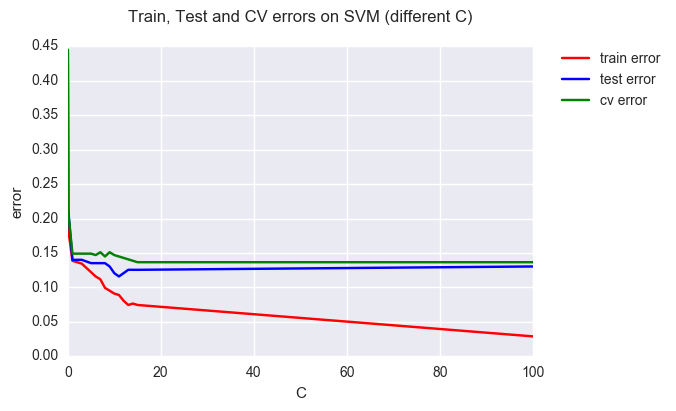

In [688]:
err_train = list()
err_test = list()
for c in Cs:
    svc = SVC(C=c)
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different C)\n')
plt.plot(Cs, err_train, 'r', label = "train error")
plt.plot(Cs, err_test, 'b', label = "test error")
plt.plot(Cs, err_cv_C, 'g', label = "cv error")
plt.xlabel('С')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Явно видно переобучение при больших С, однаком можно заметить, что для определенного значения параметра С метод показывает меньшую ошибку, чем LDA  

In [689]:
new_best_C = 1
err_min = 1.0
from sklearn.svm import SVC
for c in Cs:
    svc = SVC(C = c)
    svc.fit(X_train, y_train)

    err_train = np.mean(y_train != svc.predict(X_train))
    err_test  = np.mean(y_test  != svc.predict(X_test))
    if err_test<err_min:
        new_best_C = c
    print(c, err_train, err_test)

1e-05 0.445134575569 0.444444444444
0.0001 0.445134575569 0.444444444444
0.001 0.445134575569 0.444444444444
0.01 0.445134575569 0.444444444444
0.1 0.184265010352 0.212560386473
1.0 0.138716356108 0.140096618357
2.0 0.136645962733 0.140096618357
3.0 0.134575569358 0.140096618357
5.0 0.12215320911 0.135265700483
6.0 0.115942028986 0.135265700483
7.0 0.111801242236 0.135265700483
8.0 0.0993788819876 0.135265700483
9.0 0.0952380952381 0.130434782609
10.0 0.0910973084886 0.12077294686
11.0 0.0890269151139 0.115942028986
12.0 0.0807453416149 0.12077294686
13.0 0.0745341614907 0.125603864734
14.0 0.0766045548654 0.125603864734
15.0 0.0745341614907 0.125603864734
100.0 0.0289855072464 0.130434782609


**Вывод**: при значении параметра с=15 метод опорных векторов показывает наименьшую ошибку на тестовой выборке из всех уже расмотренных 

## Изменяем параметр gamma

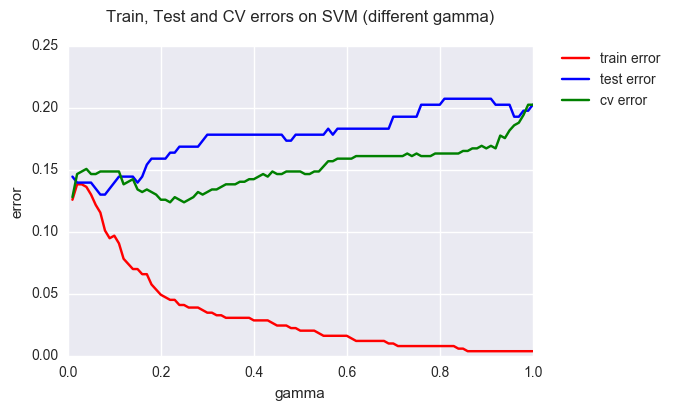

In [690]:
err_train = list()
err_test = list()
for g in gamma_array:
    svc = SVC(gamma = g)
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different gamma)\n')
plt.plot(gamma_array, err_train, 'r', label = "train error")
plt.plot(gamma_array, err_test, 'b', label = "test error")
plt.plot(gamma_array, err_cv_gamma, 'g', label = "cv error")
plt.xlabel('gamma')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Явно видно переобучение при gamma>0.2

In [691]:
svc = SVC(C = new_best_C, gamma = best_gamma).fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)
y_predict = svc.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.00207039337474 0.173913043478
[[96 19]
 [17 75]]
0.0536231884058
[[364  19]
 [ 18 289]]


**Вывод**: метод опорных векторов показывает относительно плохие результаты на тестовой выборке (переобучение по параметру gamma). При раздельном подборе параметров С и gamma не удалось достичь улучшения результатов, поэтому необходимо подбирать параметры совместно

In [693]:
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array}, cv =10)
grid.fit(X_train, y_train)
err_cv_C = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_C = 1 - grid.best_score_
best_C = grid.best_estimator_.C
best_gamma = grid.best_estimator_.gamma
svc = SVC(C = best_C, gamma = best_gamma).fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)
y_predict = svc.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(best_C, best_gamma, err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

1.0 0.01 0.126293995859 0.144927536232
[[97 18]
 [12 80]]
0.131884057971
[[326  57]
 [ 34 273]]


Как мы видим, даже совместный подбор двух параметров с помощью кросс-валидации только ухудшил результаты на тестовой выборке относительно параметров по умолчанию для метода опорных векторов

Однако при отдельном подборе параметров удалось выяснить, что при выборе параматра С=15 метод бы показывал наилучшие результаты на тестовой выборке среди рассмотренных методов

### Попробуем другое ядро (Linear)

In [71]:
Cs = 10.**np.arange(-4, 5)
gamma_array =  np.linspace(start=0.01, stop = 1.0, num = 50)
svc = SVC(kernel = 'linear')
grid = GridSearchCV(svc, param_grid = {'C': Cs}, cv =10)
grid.fit(X_train, y_train)
err_cv_C = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_C = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print("C READY")
print(best_cv_err_C, best_C, best_cv_err_gamma, best_gamma)

C READY
0.142857142857 0.1 0.124223602484 0.22


## Изменяем параметр С

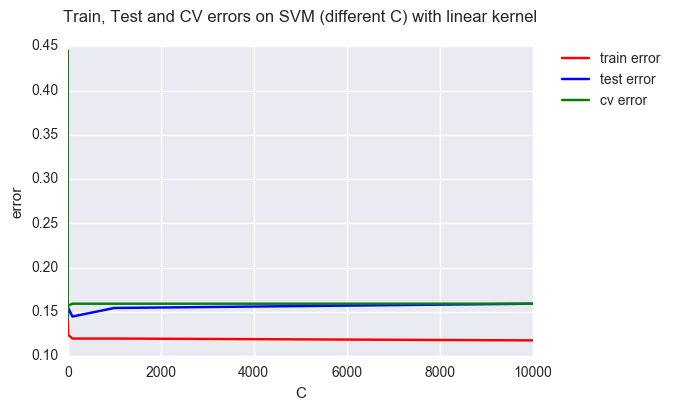

In [72]:
err_train = list()
err_test = list()
for c in Cs:
    svc = SVC(C=c, kernel = 'linear')
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different C) with linear kernel\n')
plt.plot(Cs, err_train, 'r', label = "train error")
plt.plot(Cs, err_test, 'b', label = "test error")
plt.plot(Cs, err_cv_C, 'g', label = "cv error")
plt.xlabel('С')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [143]:
svc = SVC(C = best_C, gamma = best_gamma, kernel = 'linear').fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)
y_predict = svc.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.140786749482 0.144927536232
[[92 23]
 [ 7 85]]
0.142028985507
[[306  77]
 [ 21 286]]


**Вывод**: результаты ухудшились (переобучение) относительно параметров по умолчанию

### Попробуем другое ядро (Poly)

In [605]:
Cs = 10.**np.arange(-4, 5)
gamma_array =  np.linspace(start=0.01, stop = 1.0, num = 50)
svc = SVC(kernel = 'poly')
grid = GridSearchCV(svc, param_grid = {'C': Cs}, cv =10)
grid.fit(X_train, y_train)
err_cv_C = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_C = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print("C READY")
grid = GridSearchCV(svc, param_grid = {'gamma': gamma_array})
grid.fit(X_train, y_train)
err_cv_gamma = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_gamma = 1 - grid.best_score_
grid.fit(X_train, y_train)
best_gamma = grid.best_estimator_.gamma
print(best_cv_err_C, best_C, best_cv_err_gamma, best_gamma)

C READY
0.144927536232 100.0 0.132505175983 0.131224489796


## Изменяем параметр С

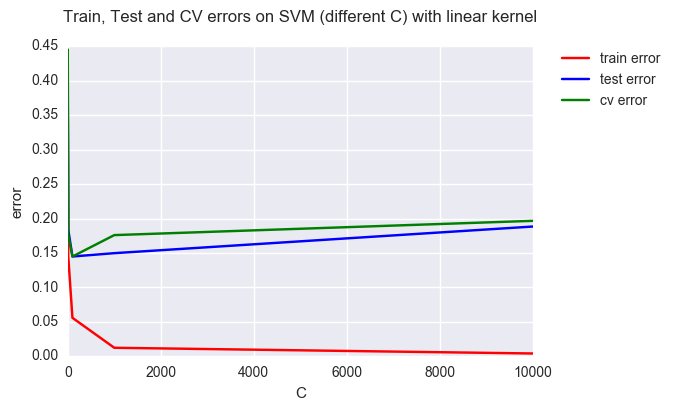

In [606]:
err_train = list()
err_test = list()
for c in Cs:
    svc = SVC(C=c, kernel = 'poly')
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different C) with linear kernel\n')
plt.plot(Cs, err_train, 'r', label = "train error")
plt.plot(Cs, err_test, 'b', label = "test error")
plt.plot(Cs, err_cv_C, 'g', label = "cv error")
plt.xlabel('С')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [607]:
svc = SVC(C=best_C, kernel = 'poly').fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)
y_predict = svc.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(best_C, best_gamma, err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

100.0 0.131224489796 0.055900621118 0.144927536232
[[100  15]
 [ 15  77]]
0.0826086956522
[[357  26]
 [ 31 276]]


**Вывод**: здесь мы явно видим переобучение при большом С

## Изменяем параметр gamma

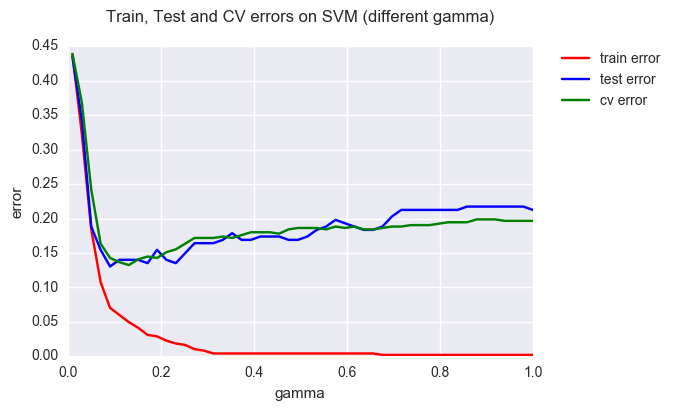

In [592]:
err_train = list()
err_test = list()
for g in gamma_array:
    svc = SVC(gamma = g, kernel = 'poly')
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different gamma)\n')
plt.plot(gamma_array, err_train, 'r', label = "train error")
plt.plot(gamma_array, err_test, 'b', label = "test error")
plt.plot(gamma_array, err_cv_gamma, 'g', label = "cv error")
plt.xlabel('gamma')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [593]:
svc = SVC(gamma = best_gamma, kernel = 'poly').fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)
y_predict = svc.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.0496894409938 0.140096618357
[[101  14]
 [ 15  77]]
0.0768115942029
[[360  23]
 [ 30 277]]


**Вывод**: результаты такие же, как и для ядра по умолчанию (rbf), результаты ухудшились относительно параметров по умолчанию

### Попробуем другое ядро (Sigmoid)

In [78]:
Cs = 10.**np.arange(-15, 4)
gamma_array =  np.linspace(start=0.01, stop = 1.0, num = 50)
svc = SVC(kernel = 'sigmoid')
grid = GridSearchCV(svc, param_grid = {'C': Cs}, cv =10)
grid.fit(X_train, y_train)
err_cv_C = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_C = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print("C READY")
grid = GridSearchCV(svc, param_grid = {'gamma': gamma_array})
grid.fit(X_train, y_train)
err_cv_gamma = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_gamma = 1 - grid.best_score_
grid.fit(X_train, y_train)
best_gamma = grid.best_estimator_.gamma
print(best_cv_err_C, best_C, best_cv_err_gamma, best_gamma)

C READY
0.445134575569 1e-15 0.136645962733 0.0302040816327


## Изменяем параметр С

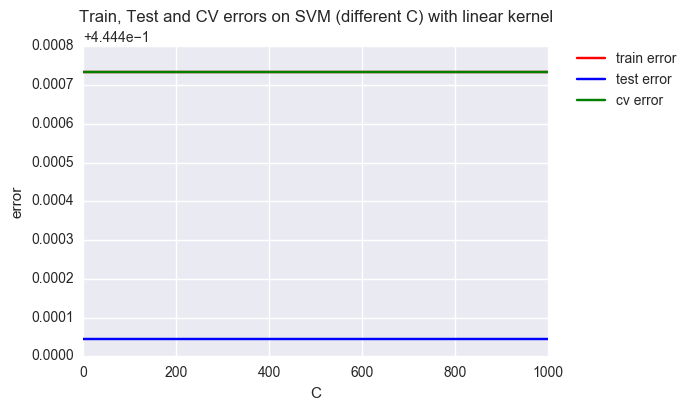

In [79]:
err_train = list()
err_test = list()
for c in Cs:
    svc = SVC(C=c, kernel = 'sigmoid')
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different C) with linear kernel\n')
plt.plot(Cs, err_train, 'r', label = "train error")
plt.plot(Cs, err_test, 'b', label = "test error")
plt.plot(Cs, err_cv_C, 'g', label = "cv error")
plt.xlabel('С')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Изменяем параметр gamma

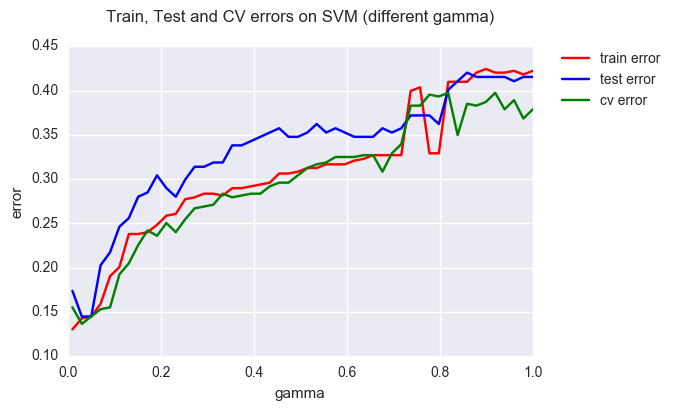

In [80]:
err_train = list()
err_test = list()
for g in gamma_array:
    svc = SVC(gamma = g, kernel = 'sigmoid')
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different gamma)\n')
plt.plot(gamma_array, err_train, 'r', label = "train error")
plt.plot(gamma_array, err_test, 'b', label = "test error")
plt.plot(gamma_array, err_cv_gamma, 'g', label = "cv error")
plt.xlabel('gamma')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [81]:
svc = SVC(gamma = best_gamma, kernel = 'sigmoid').fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)
y_predict = svc.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.142857142857 0.144927536232
[[92 23]
 [ 7 85]]
0.14347826087
[[306  77]
 [ 22 285]]


### Вывод: результаты ухудшились относительно параметров по умолчанию

# Naive Bayes

# GaussianNB

In [82]:
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings("always")
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
err_train = np.mean(y_train != gnb_model.predict(X_train))
err_test  = np.mean(y_test  != gnb_model.predict(X_test))

print(err_train, err_test)

0.27950310559 0.275362318841


### Метод плохо работает для данной задачи

In [83]:
gnb_model.class_count_

array([ 268.,  215.])

# BernoulliNB

In [84]:
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB(class_prior= list([0.55486542,  0.44513458]))
bnb_model.fit(X_train, y_train)
y_train_predict = bnb_model.predict(X_train)
y_test_predict = bnb_model.predict(X_test)
y_predict = bnb_model.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.134575569358 0.164251207729
[[104  11]
 [ 23  69]]
0.14347826087
[[345  38]
 [ 61 246]]


### Метод показал относительно плохие результаты до подбора параметров (при использовании частот в качестве априорных вероятностей)

In [85]:
prior1 = np.linspace(start=0.01, stop = 1.0, num = 100)
prior = list(map(lambda x: [x, 1-x], prior1))
grid = GridSearchCV(bnb_model, param_grid = {'class_prior': prior}, cv=10)
grid.fit(X_train, y_train)
best_cv_err = 1 - grid.best_score_
best_prior = grid.best_estimator_.class_prior
print(best_cv_err, best_prior)
err_cv = list(map(lambda x: 1 - x[1], grid.grid_scores_))

0.140786749482 [0.62, 0.38]


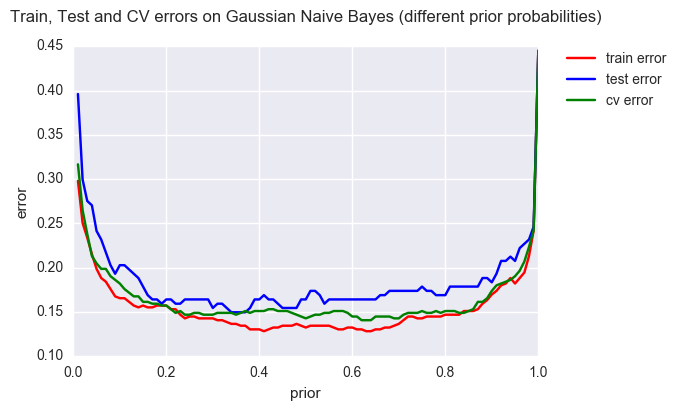

In [86]:
err_train = list()
err_test = list()
for c in prior:
    bnb_model = BernoulliNB(class_prior=c)
    bnb_model.fit(X_train, y_train)
    y_train_pred      = bnb_model.predict(X_train)
    y_test_pred = bnb_model.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))

plt.title('Train, Test and CV errors on Gaussian Naive Bayes (different prior probabilities)\n')
plt.plot(prior1, err_train, 'r', label = "train error")
plt.plot(prior1, err_test, 'b', label = "test error")
plt.plot(prior1, err_cv, 'g', label = "cv error")
plt.xlabel('prior')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [104]:
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB(class_prior= best_prior)
bnb_model.fit(X_train, y_train)

y_train_predict = bnb_model.predict(X_train)
y_test_predict = bnb_model.predict(X_test)
y_predict = bnb_model.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.130434782609 0.164251207729
[[104  11]
 [ 23  69]]


**Вывод**: метод относительно плохо работает на тестовой выборке

# Random Forest

In [88]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)
y_predict = rf.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.0 0.154589371981
[[103  12]
 [ 20  72]]
0.0463768115942
[[371  12]
 [ 20 287]]


## Выбор количества деревьев

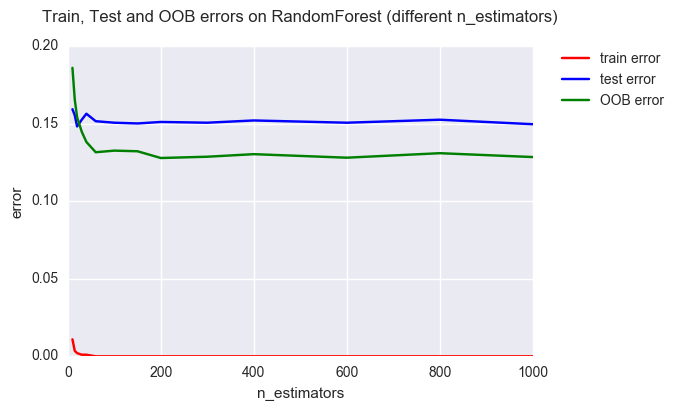

In [89]:
estims = [10, 15, 20, 30, 40, 60, 100, 150, 200, 300, 400, 600, 800, 1000]


import warnings
warnings.filterwarnings('ignore')

err_train = list()
err_test = list()
err_oob = list()
sampling_n = 10
for e in estims:
    errors_train = list()
    errors_test = list()
    errors_oob = list()
    for i in range(0,sampling_n):
        rf = ensemble.RandomForestClassifier(oob_score=True, n_estimators = e)
        rf.fit(X_train, y_train)
        y_train_pred      = rf.predict(X_train)
        y_test_pred = rf.predict(X_test)
        errors_train.append(np.mean(y_train != y_train_pred))
        errors_test.append(np.mean(y_test != y_test_pred))
        errors_oob.append(1 - rf.oob_score_)
    err_train.append(np.mean(errors_train))
    err_test.append(np.mean(errors_test))
    err_oob.append(np.mean(errors_oob))

    

warnings.filterwarnings('always')
plt.title('Train, Test and OOB errors on RandomForest (different n_estimators)\n')
plt.plot(estims, err_train, 'r', label = "train error")
plt.plot(estims, err_test, 'b', label = "test error")
plt.plot(estims, err_oob, 'g', label = "OOB error")
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Ошибка на обучающей выборке уменьшается с ростом числа деревьев, а при n_estimators = 50 уже становится нулевой, т.е. алгоритм обучился полностью верно размечать обучающую выборку, однако проблемыы переобучения не наблюдается. В данном случае, out-of-bag ошибка и ошибка на тестовой выборке почти не меняются при увеличении количества деревьев, начиная со 100 деревьев в классификаторе. Т.е. добавление новых деревьев малозаметно влияет на точность работы алгоритма. 

# Extremely Randomized Trees

In [171]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 1000).fit(X_train, y_train)
y_train_predict = ert.predict(X_train)
y_test_predict = ert.predict(X_test)
y_predict = ert.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.0 0.130434782609
[[103  12]
 [ 15  77]]


## Выбор количества деревьев

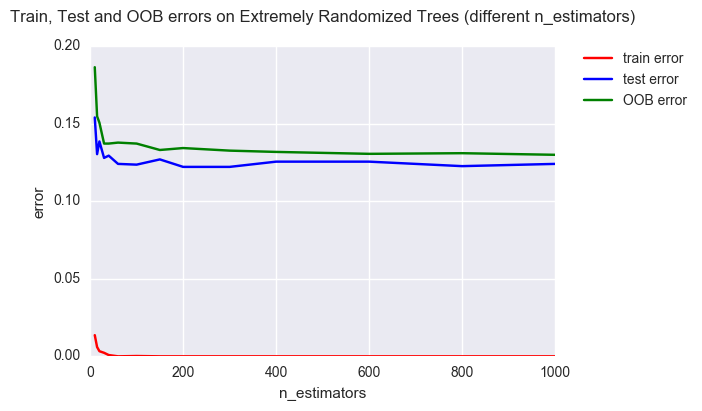

In [176]:
estims = [10, 15, 20, 30, 40, 60, 100, 150, 200, 300, 400, 600, 800, 1000]


import warnings
warnings.filterwarnings('ignore')

err_train = list()
err_test = list()
err_oob = list()
sampling_n = 10
for e in estims:
    errors_train = list()
    errors_test = list()
    errors_oob = list()
    for i in range(0,sampling_n):
        rf = ensemble.ExtraTreesClassifier(oob_score=True, n_estimators = e, bootstrap=True)
        rf.fit(X_train, y_train)
        y_train_pred      = rf.predict(X_train)
        y_test_pred = rf.predict(X_test)
        errors_train.append(np.mean(y_train != y_train_pred))
        errors_test.append(np.mean(y_test != y_test_pred))
        errors_oob.append(1 - rf.oob_score_)
    err_train.append(np.mean(errors_train))
    err_test.append(np.mean(errors_test))
    err_oob.append(np.mean(errors_oob))

    

warnings.filterwarnings('always')
plt.title('Train, Test and OOB errors on Extremely Randomized Trees (different n_estimators)\n')
plt.plot(estims, err_train, 'r', label = "train error")
plt.plot(estims, err_test, 'b', label = "test error")
plt.plot(estims, err_oob, 'g', label = "OOB error")
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Ситуация полностью аналогична **RandomForest**. Важно отметить, что при работе с ExtraTreesClassifier необходимо установить значение параметра bootstrap=True для работы с параметром, отвечающим за oob-error

# AdaBoost

In [166]:
ada = ensemble.AdaBoostClassifier(n_estimators = 13)
ada.fit(X_train, y_train)
y_train_predict = ada.predict(X_train)
y_test_predict = ada.predict(X_test)
y_predict = ada.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.111801242236 0.144927536232
[[102  13]
 [ 17  75]]
0.121739130435
[[343  40]
 [ 44 263]]


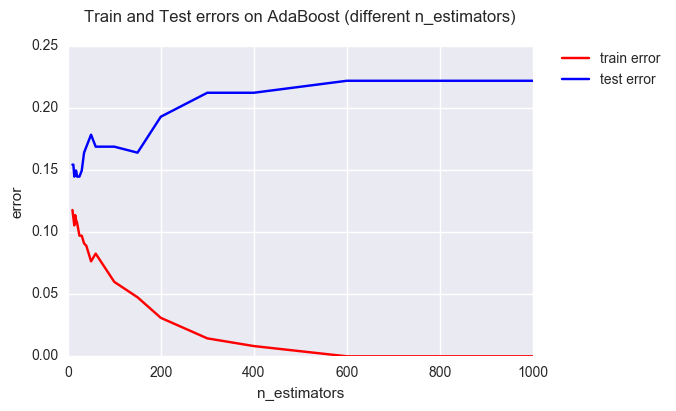

In [175]:
estims = [10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 50, 60, 100, 150, 200, 300, 400, 600, 800, 1000]


import warnings
warnings.filterwarnings('ignore')

err_train = list()
err_test = list()
sampling_n = 10
for e in estims:
    errors_train = list()
    errors_test = list()
    errors_oob = list()
    for i in range(0,sampling_n):
        rf = ensemble.AdaBoostClassifier(n_estimators = e)
        rf.fit(X_train, y_train)
        y_train_pred      = rf.predict(X_train)
        y_test_pred = rf.predict(X_test)
        errors_train.append(np.mean(y_train != y_train_pred))
        errors_test.append(np.mean(y_test != y_test_pred))
    err_train.append(np.mean(errors_train))
    err_test.append(np.mean(errors_test))
    err_oob.append(np.mean(errors_oob))

    

warnings.filterwarnings('always')
plt.title('Train and Test errors on AdaBoost (different n_estimators)\n')
plt.plot(estims, err_train, 'r', label = "train error")
plt.plot(estims, err_test, 'b', label = "test error")
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Налицо переобучение: с ростом числа деревьев ошибка на обучающей выборке падает, а на тестовой растет. 

# GBT

In [193]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 10)
gbt.fit(X_train, y_train)

y_train_predict = gbt.predict(X_train)
y_test_predict = gbt.predict(X_test)
y_predict = gbt.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.101449275362 0.154589371981
[[104  11]
 [ 21  71]]
0.117391304348
[[350  33]
 [ 48 259]]


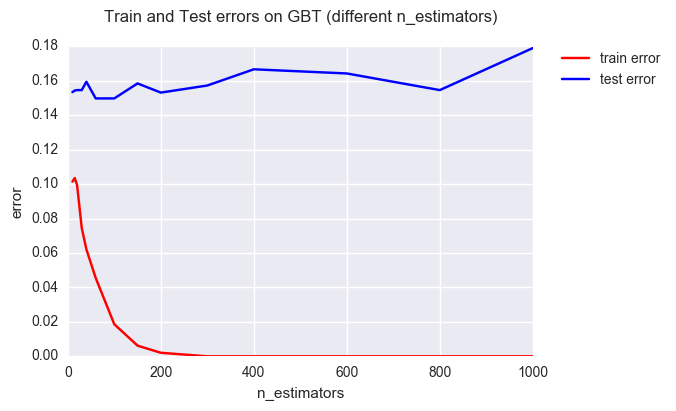

In [174]:
estims = [10, 15, 20, 30, 40, 60, 100, 150, 200, 300, 400, 600, 800, 1000]


import warnings
warnings.filterwarnings('ignore')

err_train = list()
err_test = list()
sampling_n = 20
for e in estims:
    errors_train = list()
    errors_test = list()
    errors_oob = list()
    for i in range(0,sampling_n):
        rf = ensemble.GradientBoostingClassifier(n_estimators = e)
        rf.fit(X_train, y_train)
        y_train_pred      = rf.predict(X_train)
        y_test_pred = rf.predict(X_test)
        errors_train.append(np.mean(y_train != y_train_pred))
        errors_test.append(np.mean(y_test != y_test_pred))
    err_train.append(np.mean(errors_train))
    err_test.append(np.mean(errors_test))
    err_oob.append(np.mean(errors_oob))

    

warnings.filterwarnings('always')
plt.title('Train and Test errors on GBT (different n_estimators)\n')
plt.plot(estims, err_train, 'r', label = "train error")
plt.plot(estims, err_test, 'b', label = "test error")
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Ситуация похожа на **RandomForest**. Добавление новых деревьев почти никак не влияет на точность работы метода на тестовой выборке, а при большом количестве деревьев наблюдается переобучение

**Вывод**: для методов RandomForest, Extremely Randomized Trees, AdaBoost, GBT характерно переобучение, однако все они показывают отличные результаты на тестовой выборке. Наилучшие результаты у методов LDA, SVM (с подбором параметра С), Extremely Randomized Trees . Для возможного улучшения результатов классификации был бы полезен подбор допольнительных параметров (learning_rate и max_depth), а также использование только наиболее важных признаков: A8, A10, A7, A2, A3, A14, A13, A9

# Параметры AdaBoost и GBT

Далее попробуем изменять параметры для **AdaBoost** и **Gradient Boosting Trees**. Параметр learning\_rate (замедляющий параметр) отвечает за скорость обучения классификаторов, а max_depth для GBT определяет наибольшее число узлов в каждом дереве-классификаторе (основной параметр модели, его правильная настройка позволяет добиться лучших результатов).

Для начала подберем параметры для метода **Gradient Boosting Trees**. Это метод машинного обучения для задач регрессии и классификации, который создает модель прогнозирования в виде ансамбля моделей прогнозирования, обычно деревьев решений. Он строит модель поэтапно, позволяя оптимизировать функцию потерь.

# Этот код выполняется очень долго!

In [563]:
depths = [2, 3, 5, 7, 9, 11]
#estims = [1, 3, 10, 20, 40, 60, 100, 200, 400, 600, 1000]
estims = [15, 20, 25, 30, 35]
rates = [0.05, 0.1, 0.15, 0.3, 0.5, 0.7, 1]
max_features = (2, 3, 4, 5, 'log2', 'sqrt', None )
model = ensemble.GradientBoostingClassifier()
grid = GridSearchCV(model, n_jobs=4, param_grid = {'n_estimators': estims, 'max_features': max_features, 'max_depth':depths, 'learning_rate': rates}, cv=20)
grid.fit(X_train, y_train)

In [564]:

err_cv_ = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_ = 1 - grid.best_score_
best_n_est_ = grid.best_estimator_.n_estimators
best_n_feat_ = grid.best_estimator_.max_features
best_max_d_ = grid.best_estimator_.max_depth
best_rate_ = grid.best_estimator_.learning_rate
print(best_cv_err_, best_n_est_, best_n_feat_, best_max_d_, best_rate_)

0.120082815735 30 sqrt 2 0.05


In [565]:
rows = list()
for grid_score in grid.grid_scores_:
    for fold, score in enumerate(grid_score.cv_validation_scores):
        row = grid_score.parameters.copy()
        row['fold'] = fold
        row['score'] = score
        rows.append(row)
results_df = pd.DataFrame(rows)
#with pd.option_context('display.max_rows', None):
 #   print(results_df)

In [567]:
gbt = ensemble.GradientBoostingClassifier(learning_rate=best_rate_, n_estimators=best_n_est_,  max_depth=best_max_d_,  max_features=best_n_feat_)
gbt.fit(X_train, y_train)

y_train_predict = gbt.predict(X_train)
y_test_predict = gbt.predict(X_test)
y_predict = gbt.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.128364389234 0.135265700483
[[95 20]
 [ 8 84]]
0.130434782609
[[322  61]
 [ 29 278]]


**Вывод**: как можно заметить, в данном случае не удалось подобрать параметры модели с помощью метода перекрестной проверки так, чтобы ошибка была меньше чем у LDA/SVM. Более того, метод допускает гораздо больше ошибок первого рода, которые гораздо опаснее для банков
Теперь попробуем подобрать правильные оптимальные параметры, на которых бы метод работал лучше уже ранее рассмотренных

# Этот код выполняется очень долго!

In [587]:
errs_test = []
errs_train = []
x_ = []
y_ = []
sampling_n = 10
depths = [2, 3, 5, 7, 9, 11]
#estims = [1, 3, 10, 20, 40, 60, 100, 200, 400, 600, 1000]
estims = [15, 20, 25, 30, 35]
rates = [0.05, 0.1, 0.15, 0.3, 0.5, 0.7, 1]
max_features = (2, 3, 4, 'log2', 'sqrt', None )
for f in max_features:
    for k in estims:
        for j in depths:
            for  i in rates:
                errors_train = list()
                errors_test = list()
                for sample in range(0,sampling_n):
                    clf = ensemble.GradientBoostingClassifier(learning_rate=i, n_estimators=k,  max_depth=j, max_features = f)
                    clf.fit(X_train, y_train)
                    y_train_pred      = clf.predict(X_train)
                    y_test_pred = clf.predict(X_test)
                    errors_train.append(np.mean(y_train != y_train_pred))
                    errors_test.append(np.mean(y_test != y_test_pred))
                x_.append(i)
                y_.append(j)
                errs_train.append(np.mean(errors_train))
                errs_test.append(np.mean(errors_test))
                print("Max fea:", f, " Num estimators:", k,  "Max Depth:", j, "Learn rate:", i, "Error train:", np.mean(errors_train), " on test:", np.mean(errors_test))

Max fea: 2  Num estimators: 15 Max Depth: 2 Learn rate: 0.05 Error train: 0.218426501035  on test: 0.236714975845
Max fea: 2  Num estimators: 15 Max Depth: 2 Learn rate: 0.1 Error train: 0.159627329193  on test: 0.191304347826
Max fea: 2  Num estimators: 15 Max Depth: 2 Learn rate: 0.15 Error train: 0.137474120083  on test: 0.170531400966
Max fea: 2  Num estimators: 15 Max Depth: 2 Learn rate: 0.3 Error train: 0.132919254658  on test: 0.181642512077
Max fea: 2  Num estimators: 15 Max Depth: 2 Learn rate: 0.5 Error train: 0.123188405797  on test: 0.180676328502
Max fea: 2  Num estimators: 15 Max Depth: 2 Learn rate: 0.7 Error train: 0.11801242236  on test: 0.167632850242
Max fea: 2  Num estimators: 15 Max Depth: 2 Learn rate: 1 Error train: 0.124430641822  on test: 0.186956521739
Max fea: 2  Num estimators: 15 Max Depth: 3 Learn rate: 0.05 Error train: 0.15817805383  on test: 0.191304347826
Max fea: 2  Num estimators: 15 Max Depth: 3 Learn rate: 0.1 Error train: 0.133333333333  on test:

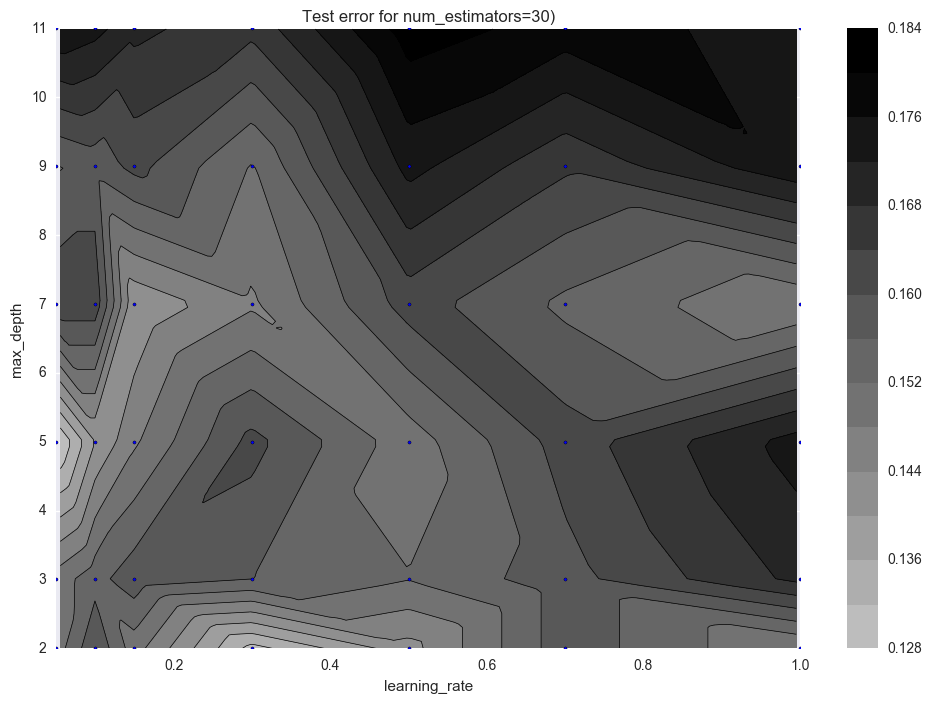

In [588]:
from matplotlib.mlab import griddata
# make up data.
#npts = int(raw_input('enter # of random points to plot:'))
npts = 200
offset1 = (len(max_features)-1)*(len(estims))*len(depths)*len(rates) + (len(estims)-2)*len(depths)*len(rates)#num_estimators = 30
offset2 = offset1 + len(depths)*len(rates)#num_estimators = 35, max_features = None
x_new = x_[offset1:offset2]
y_new = y_[offset1:offset2]
# define grid.
yi = np.linspace(2, 12, 100)
xi = np.linspace(0, 1.1, 200)
# grid the data.
zi = griddata(x_new, y_new, errs_test[offset1:offset2], xi, yi, interp='linear')
plt.figure(figsize = (12, 8))
# contour the gridded data, plotting dots at the nonuniform data points.
CS = plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
CS = plt.contourf(xi, yi, zi, 15,
                  vmax=0.18, vmin=0.10)
plt.colorbar()  # draw colorbar
# plot data points.
plt.scatter(x_new, y_new, marker='o', s=5, zorder=10)
plt.xlim(0.05, 1)
plt.ylim(2, 11)
plt.xlabel('learning_rate')
plt.ylabel('max_depth')
plt.title('Test error for num_estimators=30)')

На данной картинке изображены уровни тестовой ошибки при каждой комбинации параметров learning_rate (скорость обучения модели) и max_depth (максимальное число узлов в классификаторе). Можно заметить, что наименьшая ошибка достигается вокруг max_depth=5

In [377]:
gbt = ensemble.GradientBoostingClassifier(learning_rate=0.05, n_estimators=30,  max_depth=5)
gbt.fit(X_train, y_train)

y_train_predict = gbt.predict(X_train)
y_test_predict = gbt.predict(X_test)
y_predict = gbt.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.0455486542443 0.125603864734
[[104  11]
 [ 15  77]]
0.0695652173913
[[363  20]
 [ 28 279]]


**Вывод**: с помощью подбора параметров получилось существенно снизить среднюю ошибку метода на тестовой выборке. Теперь данный метод имеет наименьшую ошибку среди ансамблевых методов

Теперь попробуем подобрать параметры для метода **AdaBoost**.AdaBoost является адаптивным в том смысле, что каждый следующий комитет классификаторов строится по объектам, неверно классифицированным предыдущими комитетами. AdaBoost чувствителен к шуму в данных и выбросам. Однако он менее подвержен переобучению по сравнению с другими алгоритмами машинного обучения.

In [568]:
estims = [5, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 50, 60, 100, 150, 200, 300]
rates = [0.05, 0.1, 0.15, 0.3, 0.5, 0.7, 1, 1.5, 2]

import warnings
warnings.filterwarnings('ignore')
model = ensemble.AdaBoostClassifier()
grid = GridSearchCV(model, n_jobs=4, param_grid = {'n_estimators': estims,'learning_rate': rates}, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'n_estimators': [5, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 50, 60, 100, 150, 200, 300], 'learning_rate': [0.05, 0.1, 0.15, 0.3, 0.5, 0.7, 1, 1.5, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [569]:
err_cv_ = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_ = 1 - grid.best_score_
best_n_est_ = grid.best_estimator_.n_estimators
best_rate_ = grid.best_estimator_.learning_rate
print(best_cv_err_, best_n_est_, best_rate_)

0.12215320911 30 0.3


In [585]:
ab = ensemble.AdaBoostClassifier(learning_rate=best_rate_, n_estimators=best_n_est_)
ab.fit(X_train, y_train)

y_train_predict = ab.predict(X_train)
y_test_predict = ab.predict(X_test)
y_predict = ab.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.0869565217391 0.164251207729
[[99 16]
 [18 74]]
0.110144927536
[[344  39]
 [ 37 270]]


Как можно заметить, подбор параметров не дал положительных изменений. В целом, ансамбливые методы на данном датасете не показали оптимальные результаты

# Значимость признаков

Попробуем определить, какие признаки имеют наибольшее значения для классификаторов

In [608]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train);

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [609]:
np.sum(rf.feature_importances_)

1.0

In [610]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

#print("Feature ranking:")

#for f in range(d):
    #print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

In [611]:
feature_names[[0, 1, 2, 3 ,4]]

Index(['A2', 'A3', 'A7', 'A10', 'A13'], dtype='object')

(-1, 20)

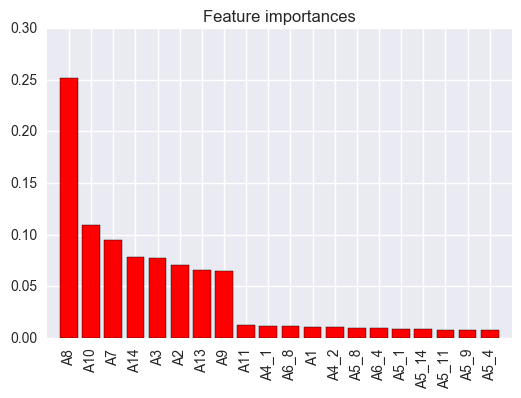

In [612]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Как уже было сказано, параметр А8 оказывает наибольшее влияние на выбор класса. Используя только его, можно с достаточной точностью (более 85%) классифицировать кредитоспособность клиента.

# Principal component analysis

 Попробуем изменить количество признаков с помощью PCA для методов опорных векторов и линейного дискриминантного анализа

## Support vector machine

In [727]:
from sklearn import decomposition
from sklearn.cross_validation import train_test_split, cross_val_score, StratifiedShuffleSplit

pca_train_errors, pca_test_errors, pca_cv_errors = [], [], []
n_components_range = range(1, 20)
sampling_n = 20
for n_components in n_components_range:
    list_test, list_train, list_cv = [], [], []
    for i in range(0,sampling_n):
        pca = decomposition.PCA(n_components)
        pca.fit(X)
        X_after_pca = pca.transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_after_pca, y, test_size=0.3)
        clf = SVC()
        clf.fit(X_train, y_train)

        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        train_error = np.mean(y_train != y_train_predict)
        test_error = np.mean(y_test != y_test_predict)
        list_train.append(train_error)
        list_test.append(test_error)

        cv = StratifiedShuffleSplit(y, n_iter=20, test_size=0.3, random_state=13)
        scores = cross_val_score(clf, X_after_pca, y, cv=cv, scoring='accuracy')
        list_cv.append(1 - scores.mean())        
    pca_train_errors.append(np.mean(list_train))
    pca_test_errors.append(np.mean(list_test))
    pca_cv_errors.append(np.mean(list_cv))

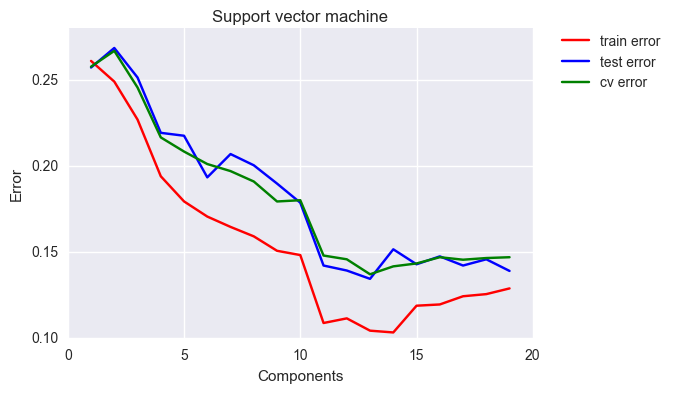

In [728]:
min_cv_error = min(pca_cv_errors)
best_parameter_value = n_components_range[pca_cv_errors.index(min_cv_error)]

plt.plot(n_components_range, pca_train_errors, 'r', label = "train error")
plt.plot(n_components_range, pca_test_errors, 'b', label = "test error")
plt.plot(n_components_range, pca_cv_errors, 'g', label = "cv error")
plt.title('Support vector machine')
plt.xlabel('Components')
plt.ylabel('Error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [729]:
pca = decomposition.PCA(best_parameter_value)
pca.fit(X)
X_after_pca = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_after_pca, y, test_size=0.3)
print(best_parameter_value)

13


In [735]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 2)
Cs = np.append(Cs, [2,3])
Cs = np.append(Cs, range(5,10))
Cs = np.append(Cs, range(11,30))
Cs = sorted(Cs)
gamma_array =  np.linspace(start=0.01, stop = 1.0, num = 100)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs}, cv =10)
grid.fit(X_train, y_train)
err_cv_C = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_C = 1 - grid.best_score_
best_C = grid.best_estimator_.C
grid = GridSearchCV(svc, param_grid = {'gamma': gamma_array})
grid.fit(X_train, y_train)
err_cv_gamma = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_gamma = 1 - grid.best_score_
best_gamma = grid.best_estimator_.gamma
print(best_cv_err_C, best_C, best_cv_err_gamma, best_gamma)

0.11801242236 11.0 0.126293995859 0.06


## Изменяем параметр С

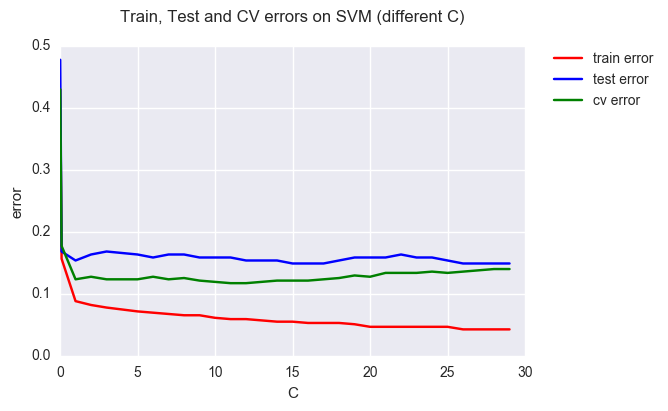

In [736]:
err_train = list()
err_test = list()
for c in Cs:
    svc = SVC(C=c)
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different C)\n')
plt.plot(Cs, err_train, 'r', label = "train error")
plt.plot(Cs, err_test, 'b', label = "test error")
plt.plot(Cs, err_cv_C, 'g', label = "cv error")
plt.xlabel('С')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### при С>10 не происходит значительных изменений в уровне ошибки

In [737]:
new_best_C = 1
err_min = 1.0
from sklearn.svm import SVC
for c in Cs:
    svc = SVC(C = c)
    svc.fit(X_train, y_train)

    err_train = np.mean(y_train != svc.predict(X_train))
    err_test  = np.mean(y_test  != svc.predict(X_test))
    if err_test<err_min:
        new_best_C = c
    print(c, err_train, err_test)

1e-05 0.430641821946 0.478260869565
0.0001 0.430641821946 0.478260869565
0.001 0.430641821946 0.478260869565
0.01 0.430641821946 0.478260869565
0.1 0.15734989648 0.169082125604
1.0 0.0890269151139 0.154589371981
2.0 0.0828157349896 0.164251207729
3.0 0.0786749482402 0.169082125604
5.0 0.0724637681159 0.164251207729
6.0 0.0703933747412 0.159420289855
7.0 0.0683229813665 0.164251207729
8.0 0.0662525879917 0.164251207729
9.0 0.0662525879917 0.159420289855
10.0 0.0621118012422 0.159420289855
11.0 0.0600414078675 0.159420289855
12.0 0.0600414078675 0.154589371981
13.0 0.0579710144928 0.154589371981
14.0 0.055900621118 0.154589371981
15.0 0.055900621118 0.149758454106
16.0 0.0538302277433 0.149758454106
17.0 0.0538302277433 0.149758454106
18.0 0.0538302277433 0.154589371981
19.0 0.0517598343685 0.159420289855
20.0 0.047619047619 0.159420289855
21.0 0.047619047619 0.159420289855
22.0 0.047619047619 0.164251207729
23.0 0.047619047619 0.159420289855
24.0 0.047619047619 0.159420289855
25.0 0.047

**Вывод**: при значении параметра с=15 метод опорных векторов показывает наименьшую ошибку на тестовой выборке из всех уже расмотренных 

## Изменяем параметр gamma

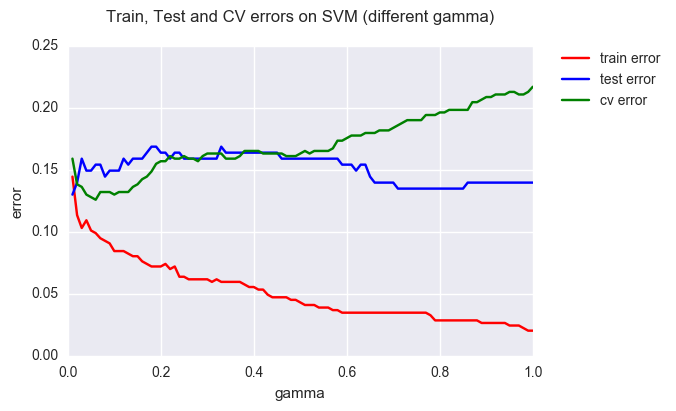

In [738]:
err_train = list()
err_test = list()
for g in gamma_array:
    svc = SVC(gamma = g)
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different gamma)\n')
plt.plot(gamma_array, err_train, 'r', label = "train error")
plt.plot(gamma_array, err_test, 'b', label = "test error")
plt.plot(gamma_array, err_cv_gamma, 'g', label = "cv error")
plt.xlabel('gamma')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Явно видно переобучение при gamma>0.2

In [739]:
svc = SVC().fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)
y_predict = svc.predict(X_after_pca)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print('Before parameters fitting')
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))


svc = SVC(C = best_C, gamma = best_gamma).fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)
y_predict = svc.predict(X_after_pca)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)

print('After parameters fitting')
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

Before parameters fitting
0.0890269151139 0.154589371981
[[86 22]
 [10 89]]
After parameters fitting
0.0683229813665 0.159420289855
[[88 20]
 [13 86]]


Как мы видим тестовая ошибка только увеличилась относительно параметров по умолчанию, а доля ошибок первого рода после применения PCA остается высокой. Следовательно, применение метода главных компонент не дало положительных изменений

# Linear Discriminant Analysis

In [740]:
from sklearn import decomposition
from sklearn.cross_validation import train_test_split, cross_val_score, StratifiedShuffleSplit

pca_train_errors, pca_test_errors, pca_cv_errors = [], [], []
n_components_range = range(1, 20)
sampling_n = 20
for n_components in n_components_range:
    list_test, list_train, list_cv = [], [], []
    for i in range(0,sampling_n):
        pca = decomposition.PCA(n_components)
        pca.fit(X)
        X_after_pca = pca.transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_after_pca, y, test_size=0.3)
        clf = discriminant_analysis.LinearDiscriminantAnalysis()
        clf.fit(X_train, y_train)

        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        train_error = np.mean(y_train != y_train_predict)
        test_error = np.mean(y_test != y_test_predict)
        list_train.append(train_error)
        list_test.append(test_error)

        cv = StratifiedShuffleSplit(y, n_iter=20, test_size=0.3, random_state=13)
        scores = cross_val_score(clf, X_after_pca, y, cv=cv, scoring='accuracy')
        list_cv.append(1 - scores.mean())        
    pca_train_errors.append(np.mean(list_train))
    pca_test_errors.append(np.mean(list_test))
    pca_cv_errors.append(np.mean(list_cv))

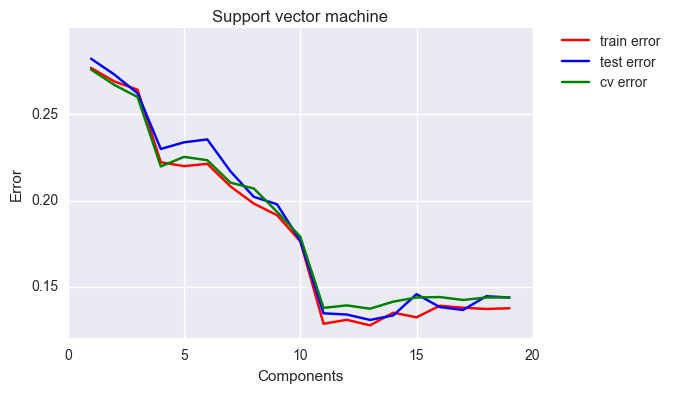

In [741]:
min_cv_error = min(pca_cv_errors)
best_parameter_value = n_components_range[pca_cv_errors.index(min_cv_error)]

plt.plot(n_components_range, pca_train_errors, 'r', label = "train error")
plt.plot(n_components_range, pca_test_errors, 'b', label = "test error")
plt.plot(n_components_range, pca_cv_errors, 'g', label = "cv error")
plt.title('Support vector machine')
plt.xlabel('Components')
plt.ylabel('Error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [744]:
pca = decomposition.PCA(best_parameter_value)
pca.fit(X)
X_after_pca = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_after_pca, y, test_size=0.3)
print(best_parameter_value)

13


In [746]:
list_test, list_train, list_cv = [], [], []
for i in range(0,sampling_n):
    
    X_train, X_test, y_train, y_test = train_test_split(X_after_pca, y, test_size=0.3)
    lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
    lda_model.fit(X_train, y_train)

    y_train_predict = lda_model.predict(X_train)
    y_test_predict = lda_model.predict(X_test)
    y_predict = lda_model.predict(X_after_pca)

    list_train.append(np.mean(y_train != y_train_predict))
    list_test.append(np.mean(y_test != y_test_predict))

print(np.mean(list_train), np.mean(list_test))
print(confusion_matrix(y_test, y_test_predict))

0.126604554865 0.134299516908
[[103  23]
 [  7  74]]


Как видим, применение метода главных компонент ухудшило результаты и для линейного дискриминантного анализа

Из всех методов, рассмотренных в этой работе, лучше всех себя **линейный дискриминантный анализ (LDA)**. Он имеет наименьшую тестовую ошибку, не требует подбора параметров и быстро обучается (также для него не наблюдается переобучения). 
Особенность данного датасета в том, что в нем присутствует признак, с помощью которого можно с высокой точностью (более 85%) классифицировать кредитоспособность клиента. Методы случайных деревьев и ансамблей классификаторов показали относительно низкую точность, хотя зачастую на практике они дают хорошие результаты. Также стоит отметить, что применение метода главных компонент не привело к положительным изменениям